## Data Processing
In that file we will dive a little deeper in charts and data processing, as:
- different types of split
- filter information
- process string fields
- convert strings into numbers


In [95]:
import pandas as pandas

# Address database
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

data = pandas.read_csv(url)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [96]:
# Splitting all strings of "Valor" column by space " ", default of split()
# Here we notice that the strings pattern may vary
data.Valor.str.split()


0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [97]:
# Now we can see that exists different patterns in the strings. However it could be spplited
# by at most two spaces
data.Valor.str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In the code below we can see that the last column has 4 types of data, maybe it doesn't make sense to want the lines that are different from `None`, because they probably are not sales values, but rentals.

In [98]:
data.Valor.str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In the code below we filtered `data` dataFrame, normalizing the field `Valor`, First we search for null values in the 3rd column of the the splitted field, than we pass that boolean array as an index of the main dataFrame, taking just the rows that is == true, in order to avoid the ones that was different of `None`, before.

In [99]:
noneFields = data.Valor.str.split(expand=True)[2].isnull()
print(data.Valor.str.split(expand=True)[2][noneFields].unique())
filteredData = data[noneFields]
filteredData.head()

[None]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Now we have to convert `Valor` label into a `int` or `float`, in order to calucalate its mean.
- First of all, we must take the correct column of the splitted value, than we replace all dots, to make the number as clean as possible, finally we convert to float with `astype` method.

In [100]:
values = filteredData.Valor.str.split(expand=True)[1]
values = values.str.replace('.', '').astype(float)
values.info()

<class 'pandas.core.series.Series'>
Int64Index: 9156 entries, 0 to 10007
Series name: 1
Non-Null Count  Dtype  
--------------  -----  
9156 non-null   float64
dtypes: float64(1)
memory usage: 143.1 KB


/tmp/ipykernel_375/1464273508.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  values = values.str.replace('.', '').astype(float)


Now we can plot a chart with the new processed data in the `Valor` column!

/tmp/ipykernel_375/2319157859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredData.Valor = values


<AxesSubplot:ylabel='Frequency'>

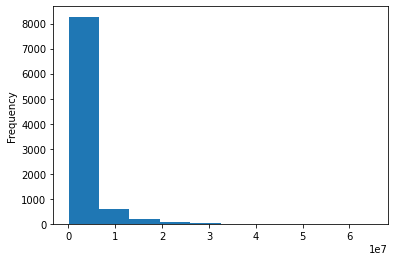

In [101]:
filteredData.Valor = values
processedData = filteredData.copy()
processedData.Valor.plot.hist()